# Exploratory Data Analysis

In [3]:
# Import standard libraries

import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
import seaborn as sns 

### Examination of Data and Features

In [5]:
# Read data and convert to a dataframe
df_raw = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Rename columns in dataframe

df = df_raw.rename(columns = {'family_history_with_overweight': 'Family_History', 
                                          'FAVC' : 'High_Cal_Foods_Frequently', 
                                          'FCVC': 'Freq_Veg', 'NCP': 'Num_Meals', 
                                          'CAEC': 'Snacking',
                                          'SMOKE': 'Smoke',
                                          'CH2O': 'Water_Intake', 
                                          'SCC': 'Calorie_Monitoring' , 
                                          'FAF': 'Phys_Activity', 
                                          'TUE': 'Tech_Use', 'CALC':
                                          "Freq_Alcohol", 
                                          'MTRANS': 'Transportation', 
                                          'NObeyesdad': 'Obesity_Level'})

# Add 'BMI' column to dataframe defined as weight divided by height
df['BMI'] = df_raw['Weight'] / (df_raw['Height'] ** 2)

# Print first rows of revised dataframe
df.head()

,Gender,Age,Height,Weight,Family_History,High_Cal_Foods_Frequently,Freq_Veg,Num_Meals,Snacking,Smoke,Water_Intake,Calorie_Monitoring,Phys_Activity,Tech_Use,Freq_Alcohol,Transportation,Obesity_Level,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


***Features***

There are 17 features in the dataframe defined above, and 1 output variable, "Obesity_Level" as follows:

**Gender**: Sex ('Male', 'Female')

**Age**: Age in years (float)

**Height**:	Height in meters (float)

**Weight**:	Weight in kilograms (float)

**Family_History**:	Family History of Obesity ('yes', 'no')

**High_Cal_Foods_Frequently**: Frequently consumes high-calorie foods ('yes', 'no')

**Freqency_Veg**:	Number of meals per day in which vegetables are usually consumed (integer)

**Num_Meals**:	Number of main meals per day (float)

**Snacking**:	Eat food between meals ('no', 'Sometimes', 'Frequently', 'Always')

**Smoke**:	Smoker ('yes', 'no')

**Water_Intake**:	Liters of water consumed per day (float)

**Calorie_Monitoring**:	Calories being monitored ('no', 'Sometimes', 'Frequently', 'Always')

**Physical_Activity**:	Number of days of physical activity per week (float)

**Tech_Use**:	Amount of time spent using technological devices per day (float)

**Frequency_Alcohol**:	Frequency of alcohol intake ('no', 'Sometimes', 'Frequently', 'Always')

**Transportaion**:	Means of transportation most used ('Public_Transportation' ,'Walking', 'Automobile', 'Motorbike', 'Bike')

**Obesity_Level**:	Categories based on body mass index ('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II' and 'Obesity_Type_III')

**BMI** : Weight/Height (float)

In [7]:
descriptive_stats= data_describtion= df.describe()
descriptive_stats

,Age,Height,Weight,Freq_Veg,Num_Meals,Water_Intake,Phys_Activity,Tech_Use,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


In [8]:
num_cols = ['Age', 'Height', 'Weight', 'Freq_Veg', 'Num_Meals', 'Water_Intake','Phys_Activity', 'Tech_Use']

categorical_cols = ['Gender', 'Family_History',	'High_Cal_Foods_Frequently', 'Snacking', 'Smoke', 'Calorie_Monitoring' 'Freq_Alcohol','Transportation']

### Exploration of the Relationship between Numerical Features

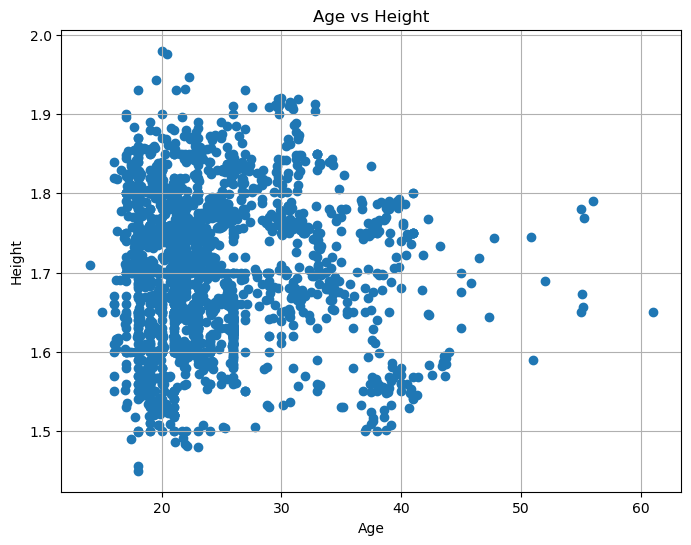

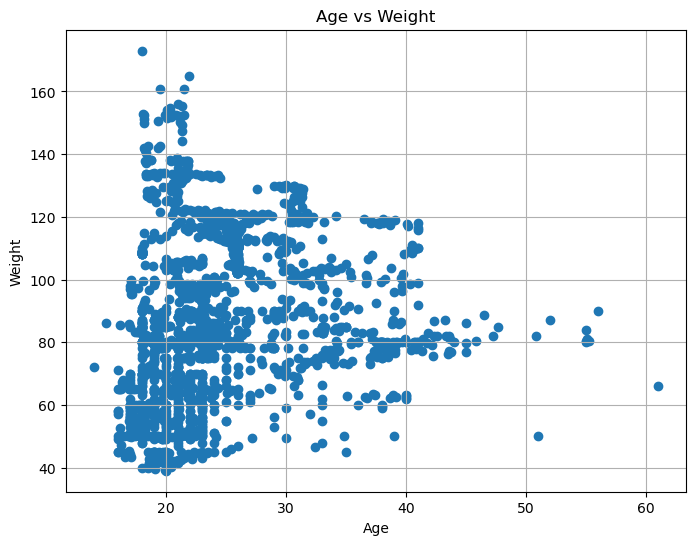

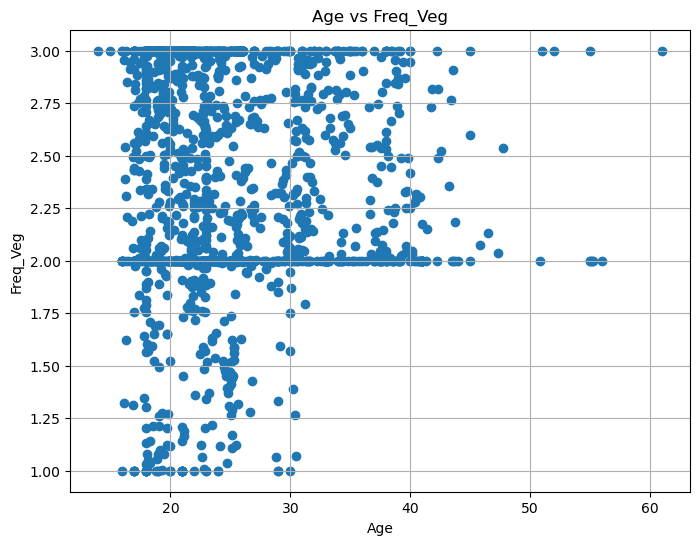

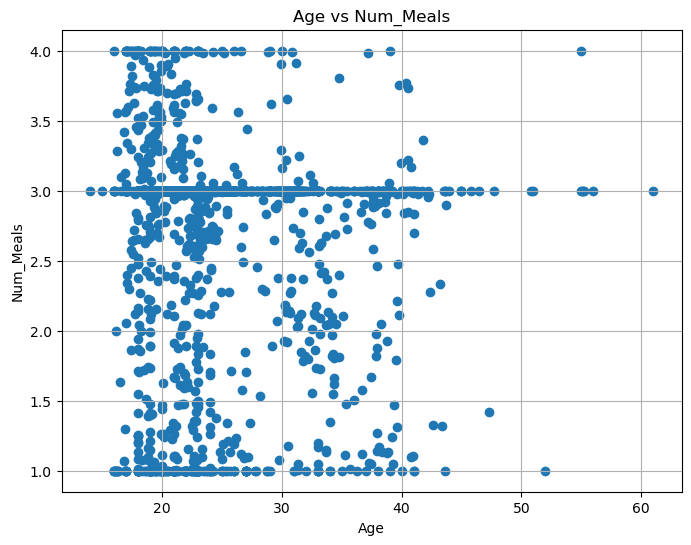

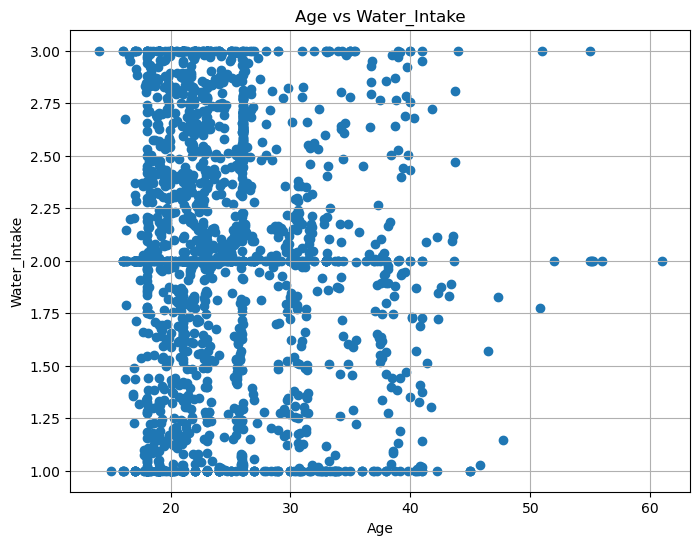

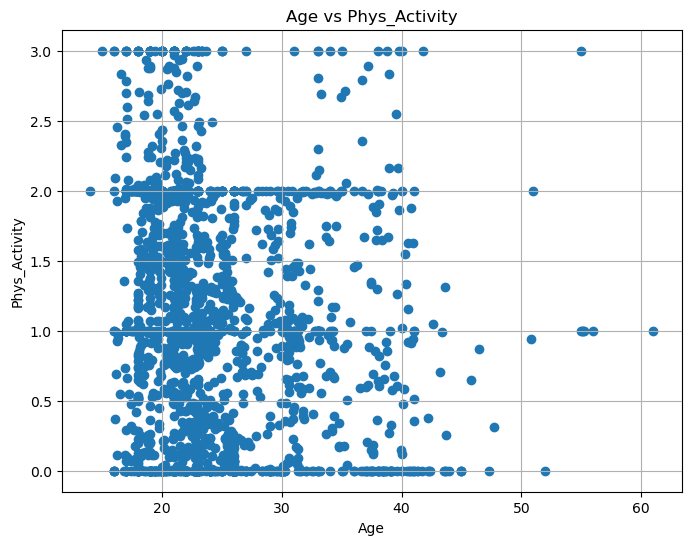

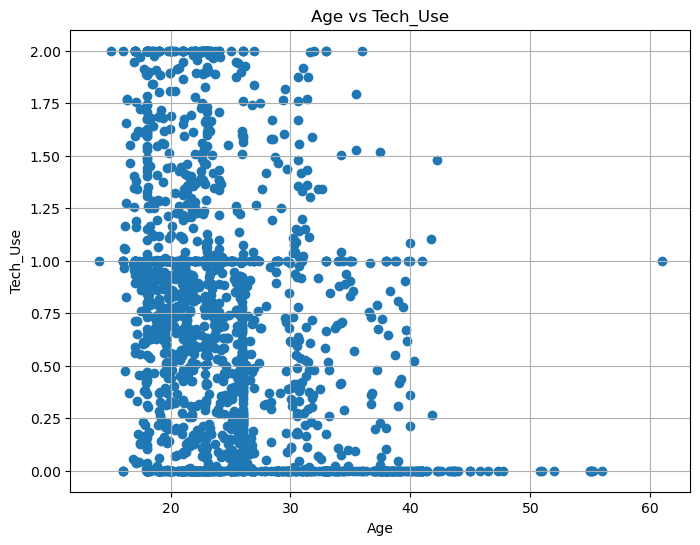

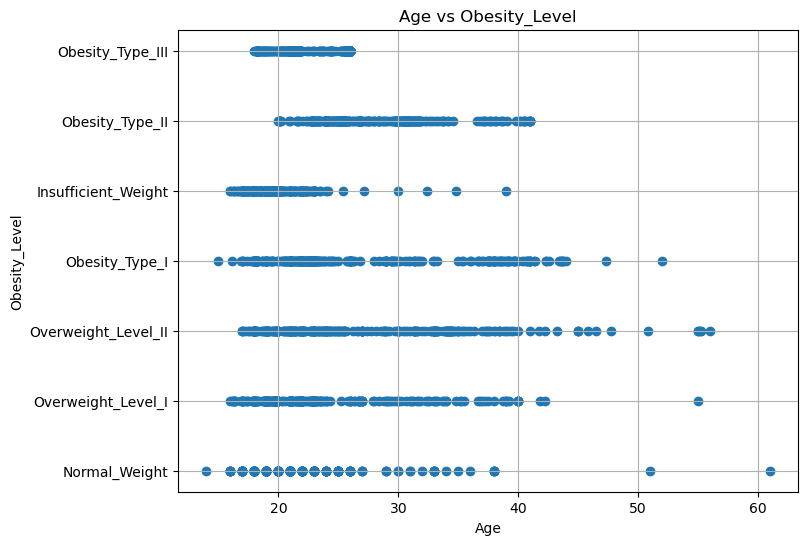

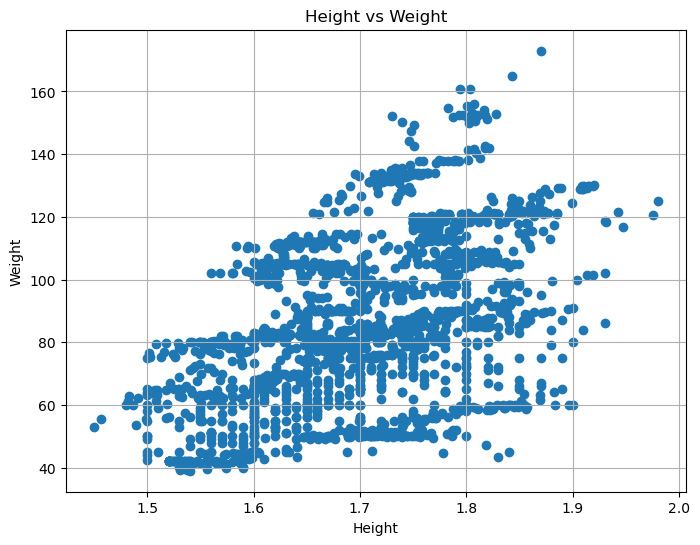

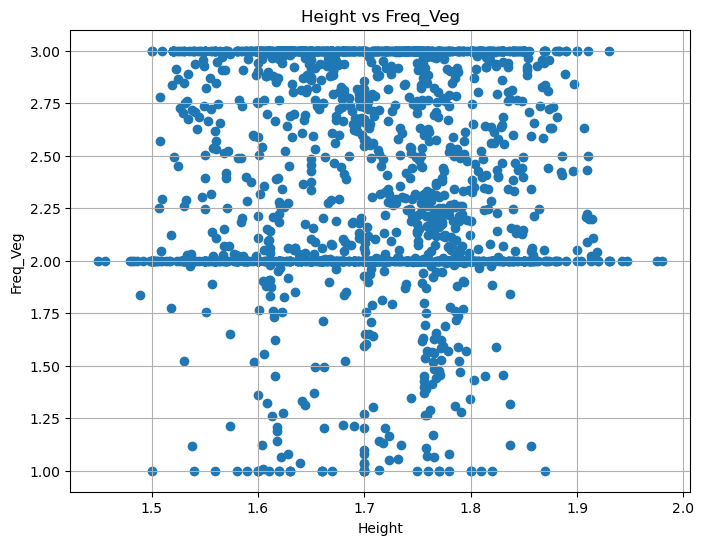

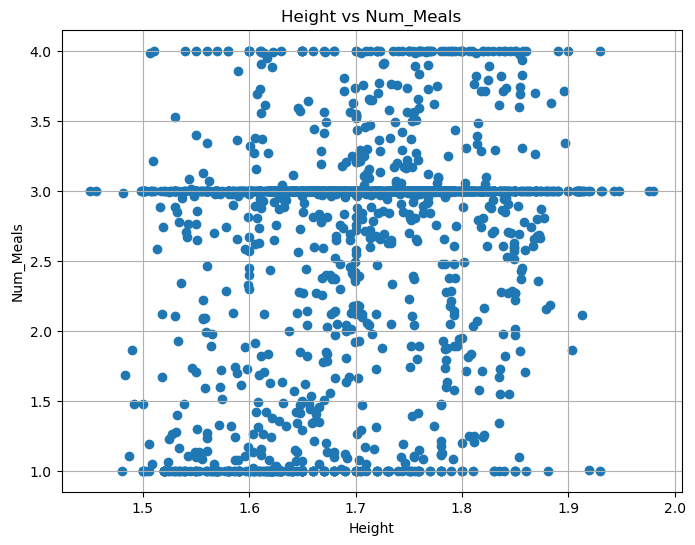

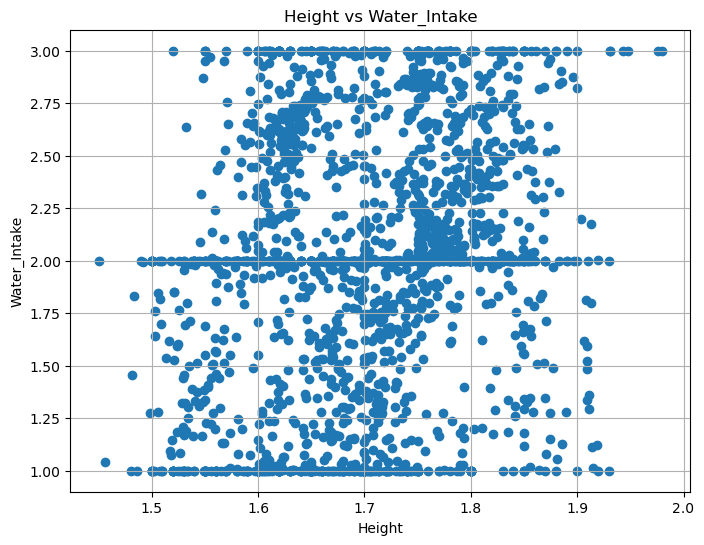

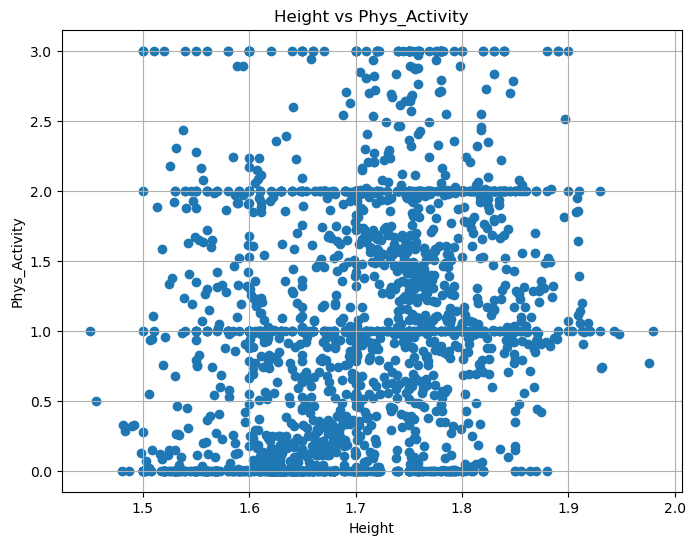

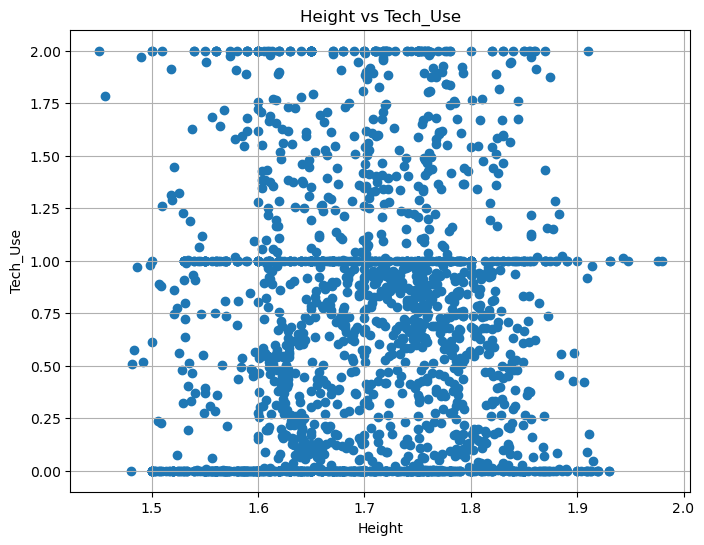

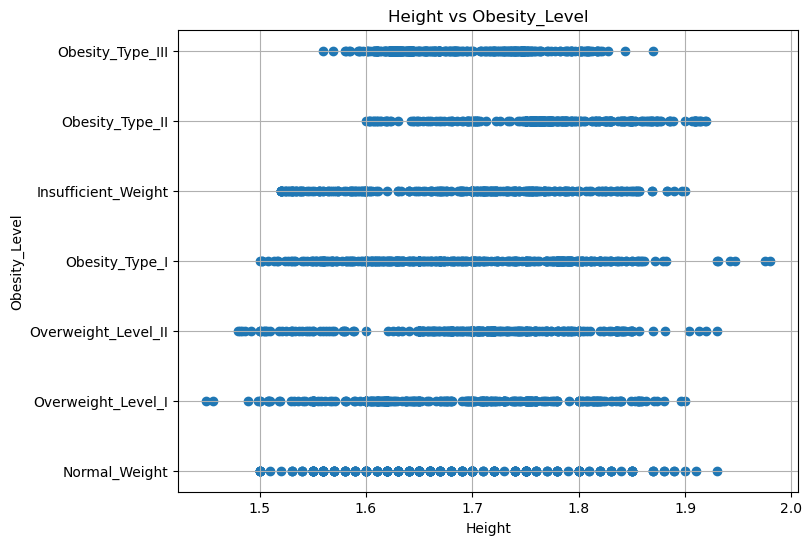

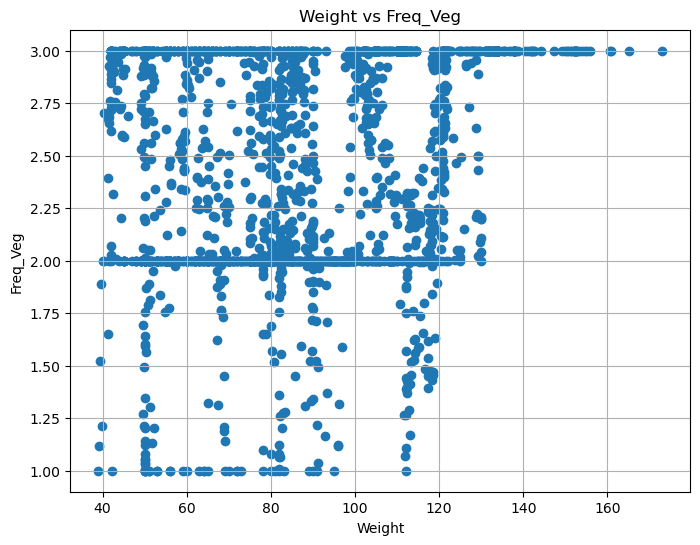

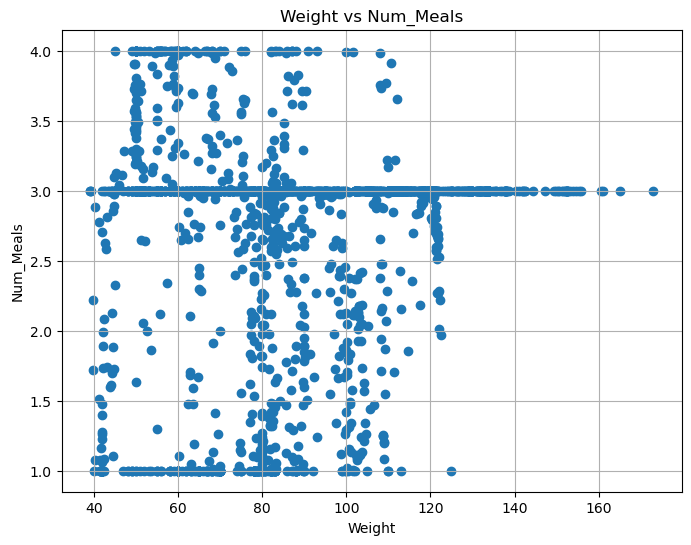

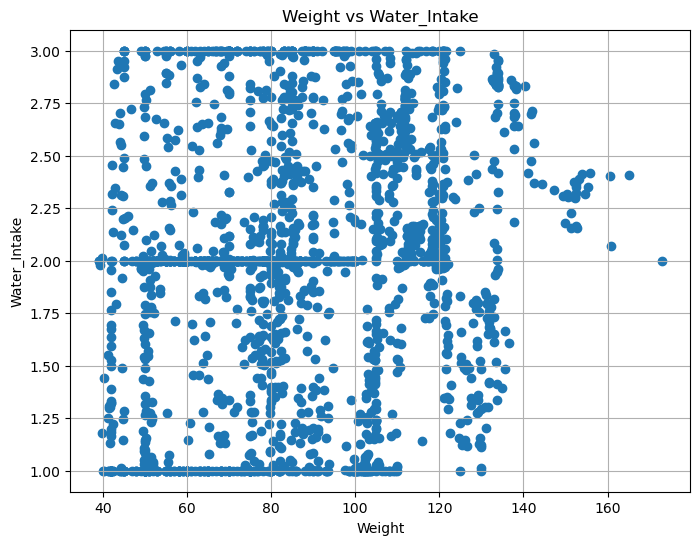

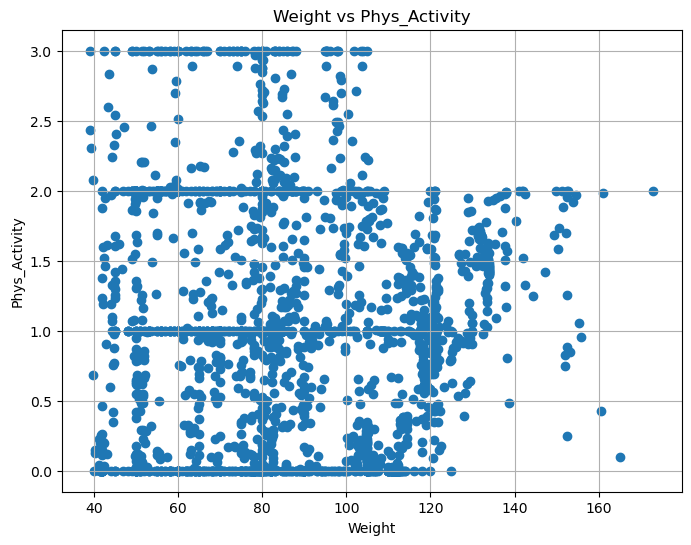

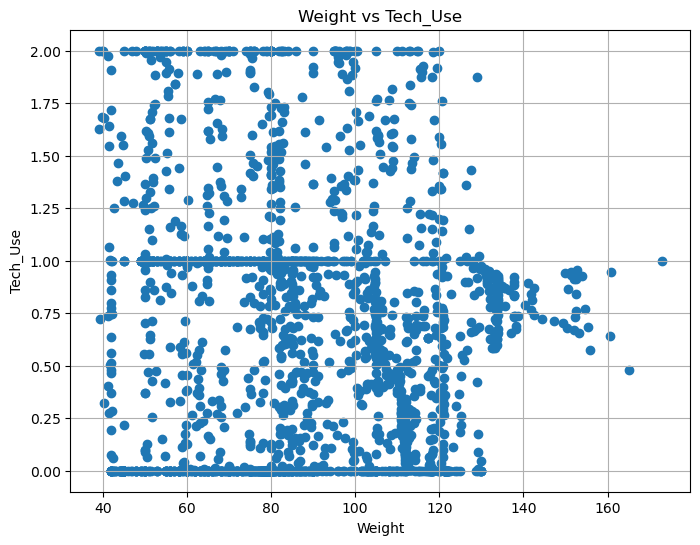

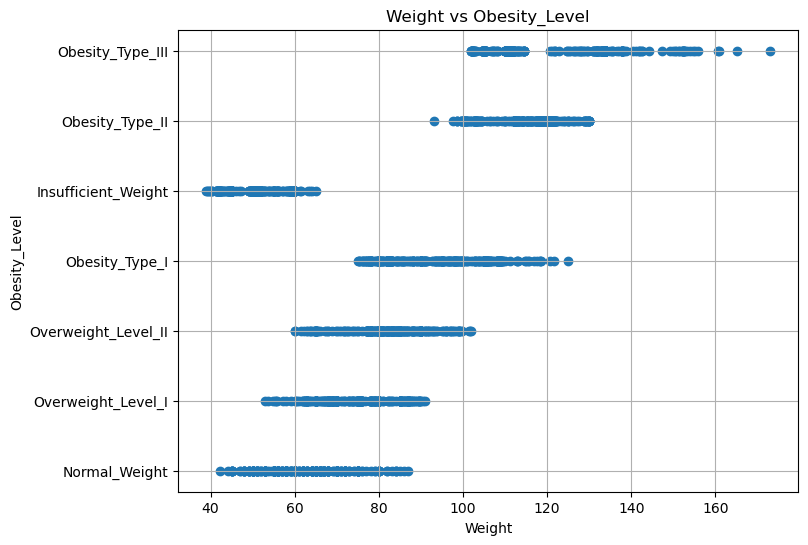

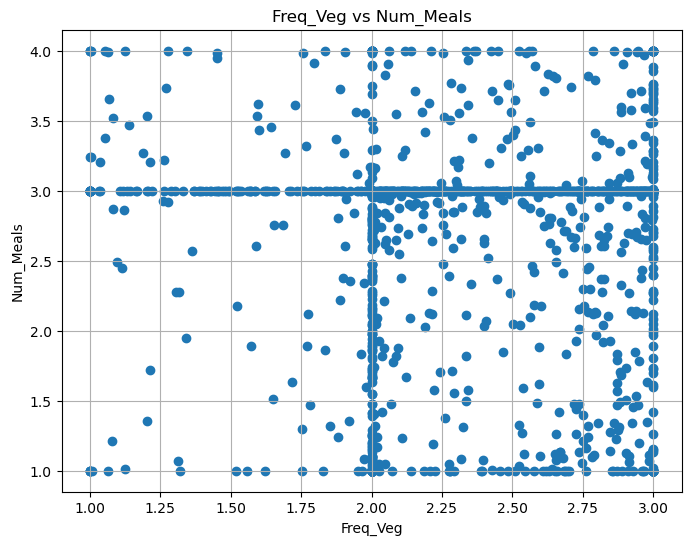

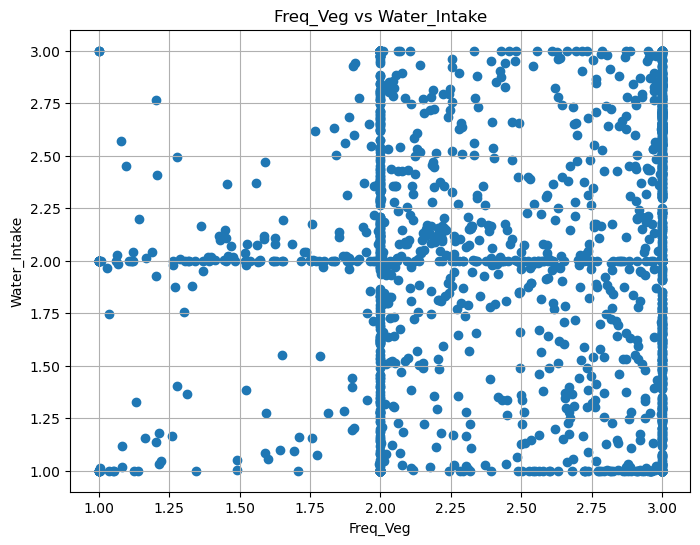

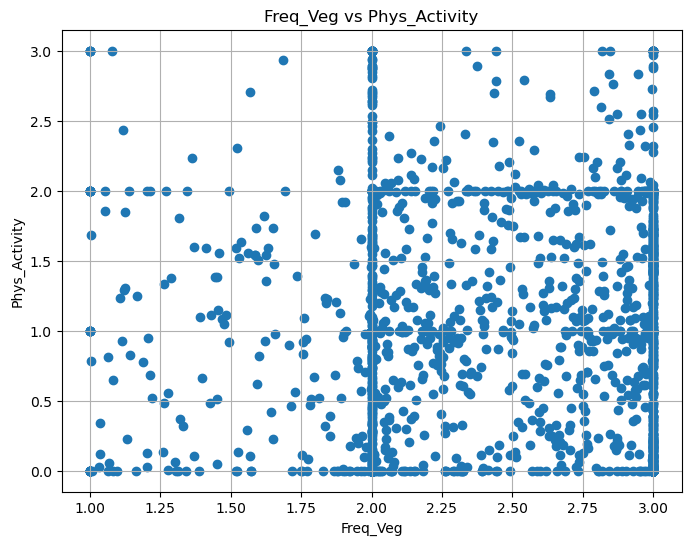

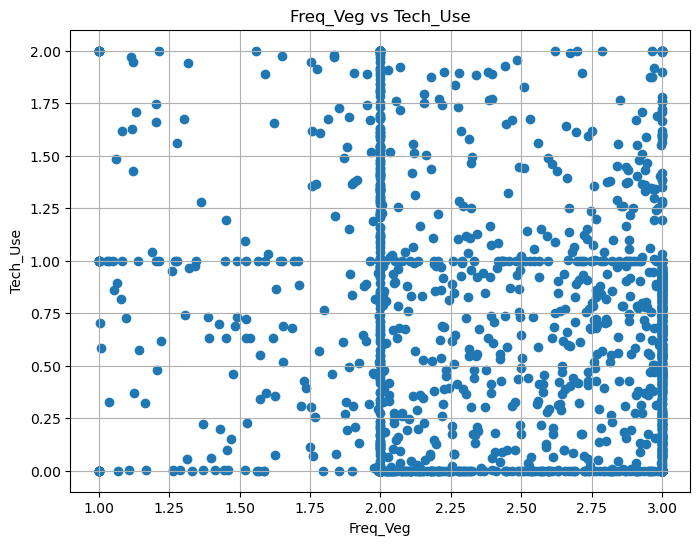

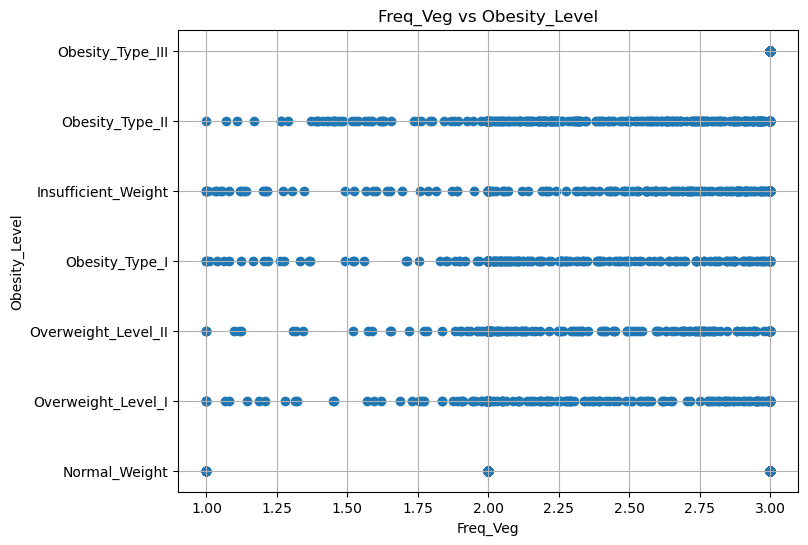

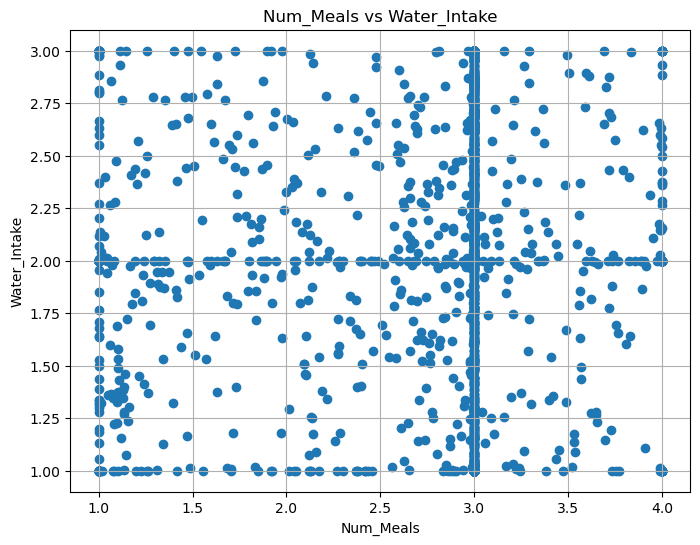

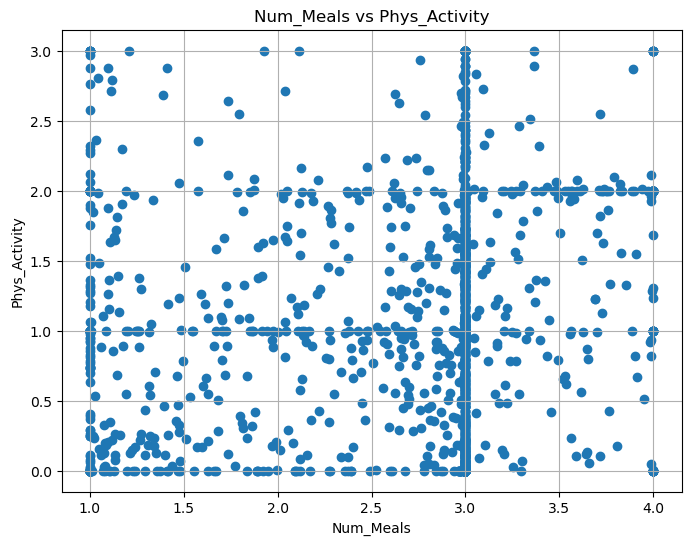

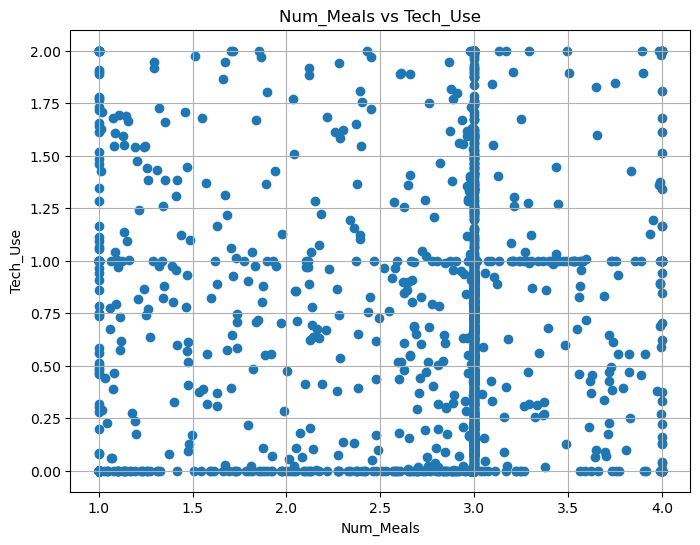

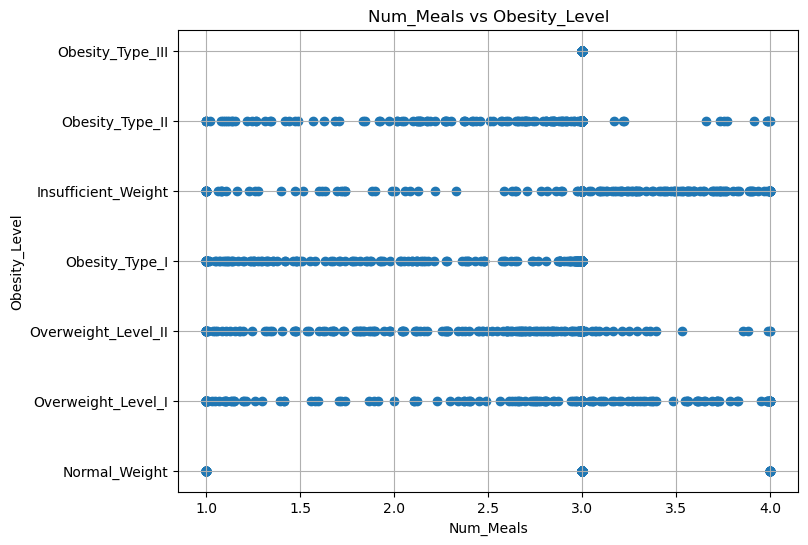

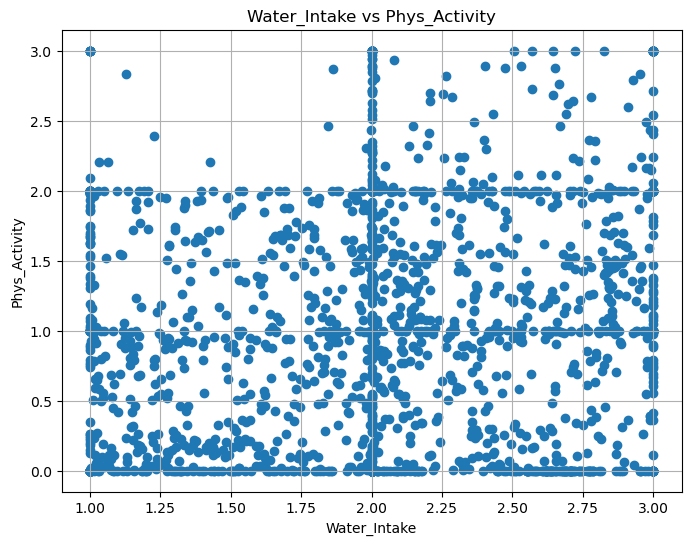

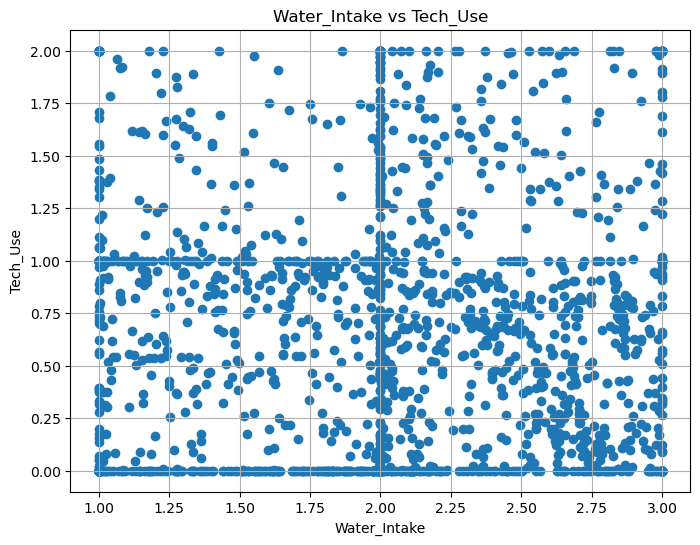

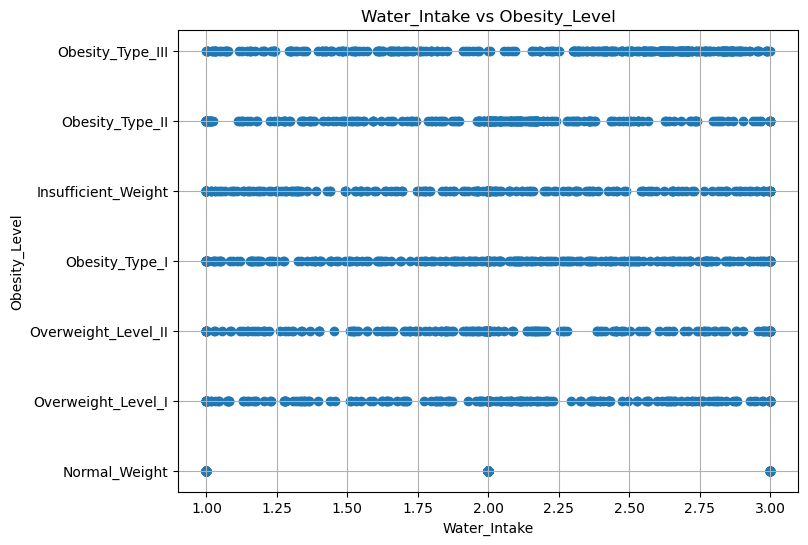

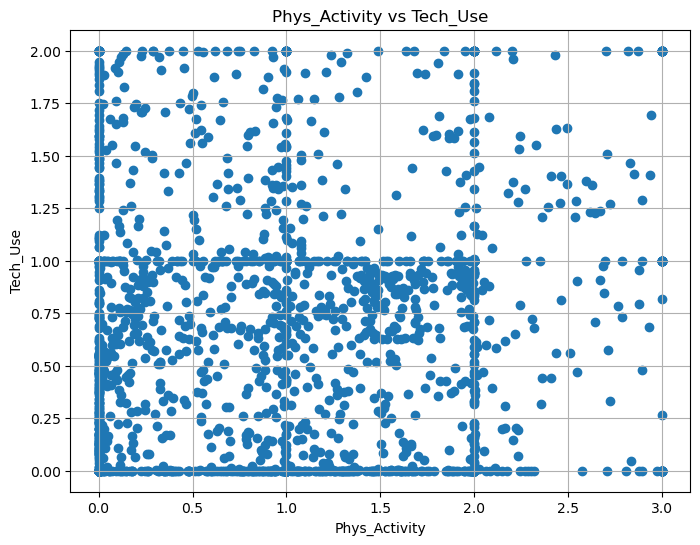

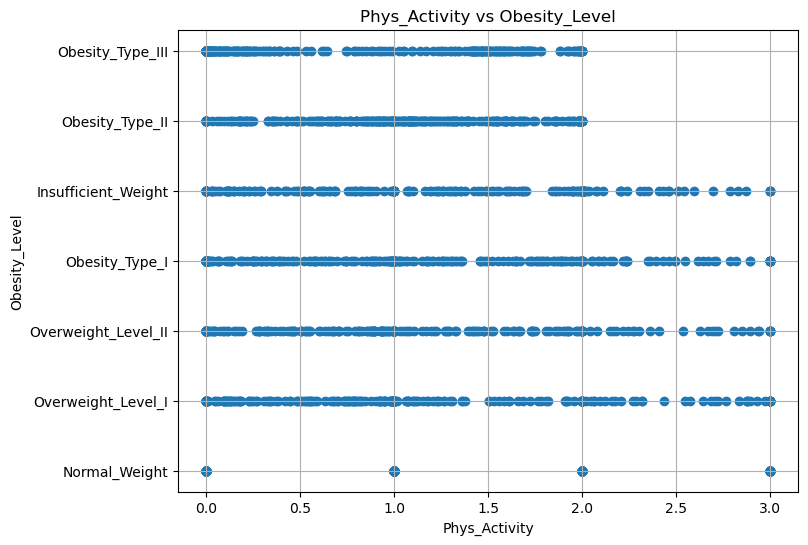

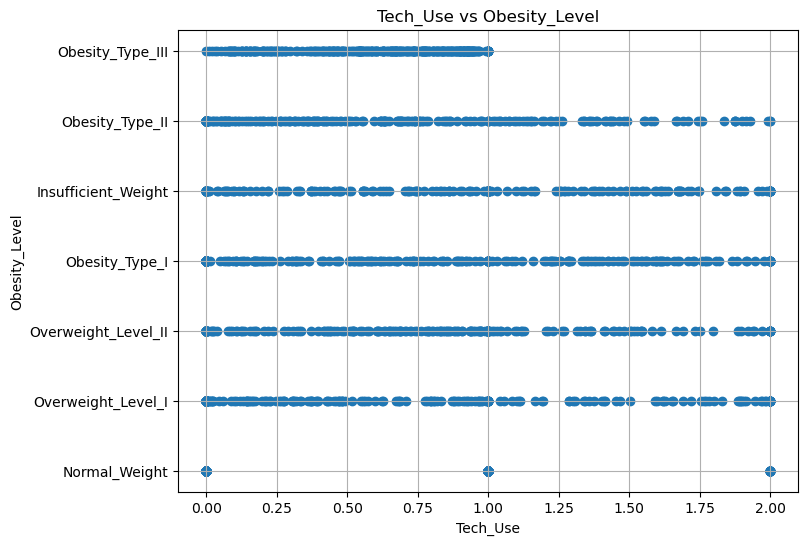

In [22]:
import matplotlib

num_cols = ['Age', 'Height', 'Weight', 'Freq_Veg', 'Num_Meals', 'Water_Intake', 'Phys_Activity', 'Tech_Use', 'Obesity_Level'] 

for i in range(len(num_cols)): 
    for j in range(i + 1, len(num_cols)): 
        plt.figure(figsize=(8, 6)) 
        plt.scatter(df[num_cols[i]], 
        df[num_cols[j]], marker='o', linestyle='-') 
        plt.title(f'{num_cols[i]} vs {num_cols[j]}') 
        plt.xlabel(num_cols[i]) 
        plt.ylabel(num_cols[j]) 
        plt.grid(True) 
        plt.show()

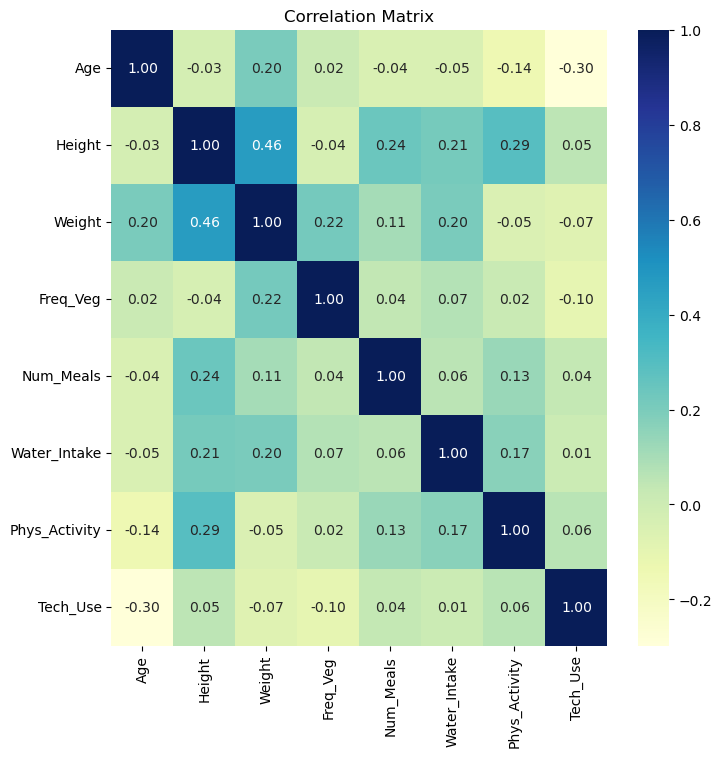

In [74]:
# Creating the correlation matrix 

df_select = df[num_cols].drop(columns='Obesity_Level')

corr_matrix = df_select.corr() 

# Display the correlation matrix 
plt.figure(figsize=(8, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Correlation Matrix')

plt.show()

### Relationship of BMI to Obesity Level

We now plot BMI versus Obesity Level to see how these levels are categorized.

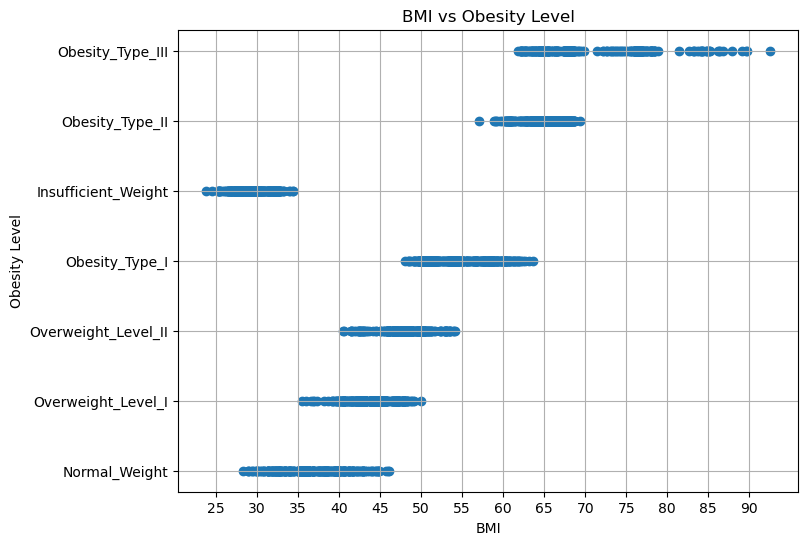

In [53]:
# Calculate Weight/Height ratio 
df['BMI'] = df['Weight'] / df['Height'] 

# Create scatter plot 
plt.figure(figsize=(8, 6)) 
plt.scatter(df['Weight_Height_Ratio'], 
            df['Obesity_Level'], marker='o') 
plt.title('BMI vs Obesity Level') 
plt.xlabel('BMI') 
plt.ylabel('Obesity Level') 
plt.grid(True)

# Make the x-axis more refined with labels increasing by 5 units 
#plt.xlim(15, 95)

plt.xticks(ticks=[i for i in range(25, 91, 5)])



plt.show()


The above graph shows us the relationship between BMI and Obesity Level. Traditionally BMI has been used as a way of measuring obesity levels. However more recently additional measure are being used. Here are the categories of weight with the (approximate) corresponding range of BMI values that appear in the data.

- 'Insufficient_Weight' : BMI = [18-35]
- 'Normal Weight' : BMI = [27.5-46]
- 'Overweight Level I': BMI = [35-50]
- 'Overweight Level II': BMI = [40-54]
- 'Obesity_Type I': BMI =[47.5-64]
- 'Obesity_Type II': BMI = [57.5-70]
- 'Obesity_Type III': BMI =  [61-92]

In [58]:
df[['BMI','Obesity_Level']].describe()

,BMI
count,2111.000000
mean,50.638549
std,14.265599
min,23.788477
25%,40.469309
50%,49.376062
75%,63.496039
max,92.513369
